# Chris Jupyter Notebook Movie Analysis

### Imports and File Read-ins 

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#file locations
directors_file = "files/imbd_files/directors.csv"
known_for_file= "files/imbd_files/known_for.csv"
movie_akas_file = "files/imbd_files/movie_akas.csv"
movie_basics_file = "files/imbd_files/movie_basics.csv"
movie_ratings_file= "files/imbd_files/movie_ratings.csv"
persons_file = "files/imbd_files/persons.csv"
principals_file= "files/imbd_files/principals.csv"
writers_file = "files/imbd_files/writers.csv"

# read files into dataframes
directors = pd.read_csv(directors_file)
known_for = pd.read_csv(known_for_file)
movie_akas = pd.read_csv(movie_akas_file)
movie_basics = pd.read_csv(movie_basics_file)
movie_ratings = pd.read_csv(movie_ratings_file)
persons = pd.read_csv(persons_file)
principals = pd.read_csv(principals_file)
writers = pd.read_csv(writers_file)

# Read in Data For Revenue Section
budgets = pd.read_csv('Files/tn.movie_budgets.csv.gz')

# list of tables for reference
IMBD_df_list = ['directors', 'known_for', 'movie_akas', 'movie_basics', 'movie_ratings', 'persons', 'principals', 'writers']

In [3]:
#List of Dataframe Table in IMBD dataset
IMBD_df_list

['directors',
 'known_for',
 'movie_akas',
 'movie_basics',
 'movie_ratings',
 'persons',
 'principals',
 'writers']

# Top Popular Rated Movies

## Top 100 Movies Based On Rating

In [4]:
# merge movie ratings with movie basics
movie_info = pd.merge(movie_basics, movie_ratings, how="inner", on='movie_id')

In [5]:
# View of DataFrame
movie_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
# movies sort by most votes and avereage rating
top_movies = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 100 movies selected
top_100_movies = top_movies.iloc[:100]
# top 100 movies sorted specifically by movie rating
top_100_movies = top_100_movies.sort_values(by='averagerating', ascending=False)
#index reseted for top 100 movies
top_100_movies = top_100_movies.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_100_movies = top_100_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})
top_100_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         100 non-null    object 
 1   primary_title    100 non-null    object 
 2   original_title   100 non-null    object 
 3   start_year       100 non-null    int64  
 4   runtime_minutes  100 non-null    float64
 5   genres           100 non-null    object 
 6   avg_rating       100 non-null    float64
 7   num_votes        100 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


### Bar Graph of Top 100 Movies Based On Rating

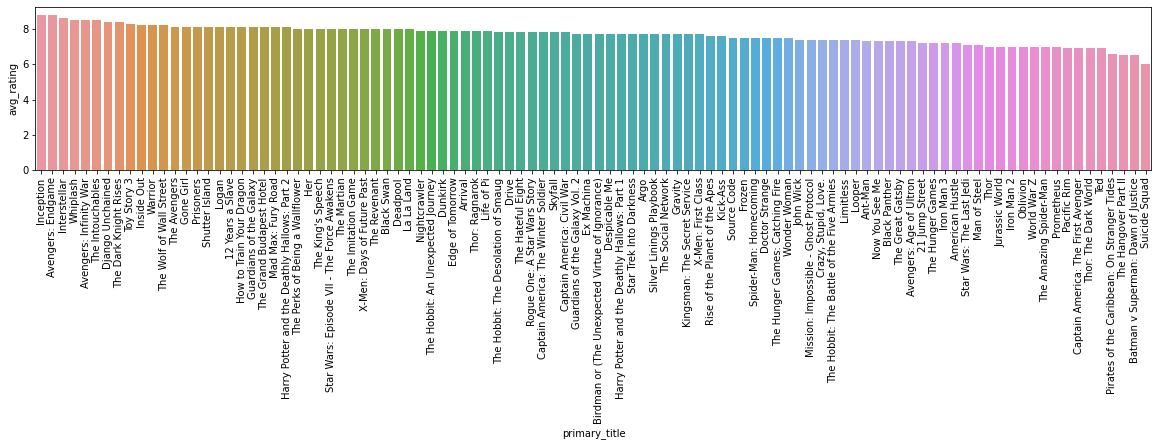

In [7]:
# bar plot for average rating of top 100 movies 
plt.figure(figsize = (20,3))
plt.xticks(rotation = 90)
sns.barplot(x=top_100_movies.primary_title, y=top_100_movies.avg_rating);

## Director Count in the Top 100 Movies Based on Popular Rating

In [63]:
# merge movie directors with top 100 movies
top_movie_dir = pd.merge(top_100_movies, directors, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_movie_dir = pd.merge(top_movie_dir, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_movie_dir = top_movie_dir.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_movie_dir.drop_duplicates(subset=['movie_id'], inplace=True)
top_movie_dir.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
3,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
7,tt5013056,Dunkirk,7.9,466580,nm0634240,Christopher Nolan
8,tt4154796,Avengers: Endgame,8.8,441135,nm0751577,Anthony Russo


In [64]:
# count of directors in top 100 movies
top_directors = top_movie_dir.primary_name.value_counts()
top_directors.head()

Anthony Russo        4
Christopher Nolan    4
Peter Jackson        3
Matthew Vaughn       3
Ridley Scott         2
Name: primary_name, dtype: int64

### Bar Graph of Director Count In Top 100 Movies Based on Popular Rating

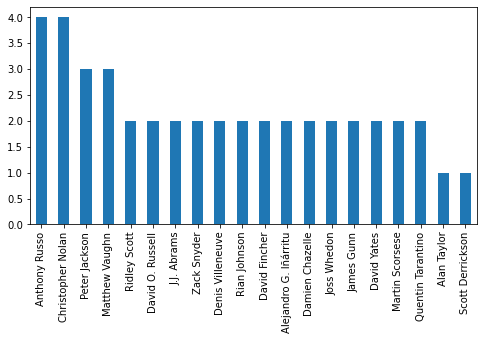

In [65]:
# bar plot of 20 top directors based on count in top 100 movies
top_directors.head(20).plot(kind='bar', figsize=(8, 4));

## Writer Count In Top 100 Movies Based On Popular Rating

In [11]:
# merge movie writers with top 100 movies
top_writers = pd.merge(top_100_movies, writers, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_writers = pd.merge(top_writers, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_writers = top_writers.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_writers.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
2,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
3,tt5013056,Dunkirk,7.9,466580,nm0634240,Christopher Nolan
4,tt0770828,Man of Steel,7.1,647288,nm0634240,Christopher Nolan


In [12]:
# count of directors in top 100 movies
top_writers = top_writers.primary_name.value_counts()
top_writers.head()

Jack Kirby            21
Stan Lee              18
Christopher Markus    10
Stephen McFeely       10
Larry Lieber           9
Name: primary_name, dtype: int64

### Writer Count In Top 100 Movies Based On Popular Rating

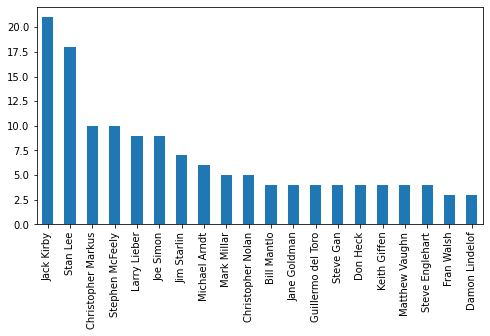

In [13]:
# bar plot of 20 top writers based on count in top 100 movies
top_writers.head(20).plot(kind='bar', figsize=(8, 4));

## Actor Count In Top 100 Movies Based On Popular Rating

In [14]:
# merge movie principals with top 100 movies
top_principals= pd.merge(top_100_movies, principals, how="inner", on='movie_id')
# merge persons with top principals table to get principal names
top_principals = pd.merge(top_principals, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_principals = top_principals.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title', 'job', 'characters'])

In [15]:
# filter top principals to get top principal actors
top_principal_actors = top_principals[(top_principals.category == 'actor') | (top_principals.category == 'actress')]
top_principal_actors.head()

,movie_id,primary_title,avg_rating,num_votes,ordering,person_id,category,primary_name
1,tt1375666,Inception,8.8,1841066,1,nm0000138,actor,Leonardo DiCaprio
2,tt1853728,Django Unchained,8.4,1211405,3,nm0000138,actor,Leonardo DiCaprio
3,tt0993846,The Wolf of Wall Street,8.2,1035358,1,nm0000138,actor,Leonardo DiCaprio
4,tt1130884,Shutter Island,8.1,1005960,1,nm0000138,actor,Leonardo DiCaprio
5,tt1663202,The Revenant,8.0,621193,1,nm0000138,actor,Leonardo DiCaprio


In [16]:
# count of principal actor appearing in top 100 movies
top_actors = top_principal_actors.primary_name.value_counts()
top_actors.head()

Robert Downey Jr.    8
Chris Evans          7
Chris Hemsworth      6
Leonardo DiCaprio    6
Mark Ruffalo         6
Name: primary_name, dtype: int64

### Bar Graph of Actor Count In Top 100 Movies Based On Popular Rating

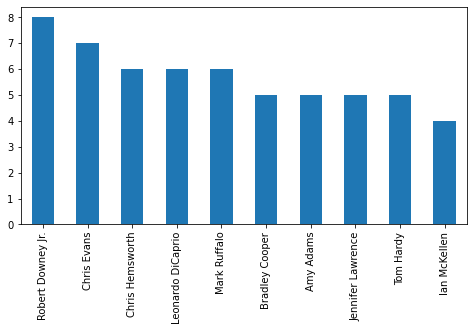

In [17]:
# bar plot of top 10 actors based on number of times they appear in the top 100 movies
top_actors.head(10).plot(kind='bar', figsize=(8, 4));

## Genre Count In Top 100 Movies Based On Popular Rating

In [18]:
# Declaring new variable to split genre data into separate columns
string_split = top_100_movies
# splitting genre values into new columns
genre_split = string_split["genres"].str.split(",", n = 3, expand = True)
# concatination genre columns into 1 series
top_100_movies_genres = pd.concat([genre_split[0], genre_split[1], genre_split[2]])
# drop na from genre series
top_100_movies_genres = top_100_movies_genres.dropna()
# counting genre counts in top 100 movie list
top_genre_counts = top_100_movies_genres.value_counts()
top_genre_counts

Adventure    57
Action       54
Drama        36
Sci-Fi       36
Comedy       20
Fantasy      16
Thriller     13
Crime        11
Mystery      11
Biography     8
Animation     5
Romance       4
History       3
Family        2
Music         2
Western       1
Horror        1
Sport         1
dtype: int64

### Bar Graph of Genre Count In Top 100 Movies Based On Popular Rating

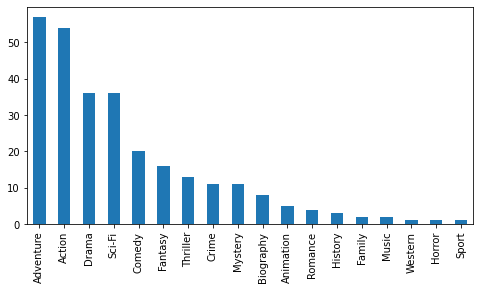

In [19]:
# bar plot of top genre counts from top 100 movies
top_genre_counts.plot(kind='bar', figsize=(8, 4));

# Top Movies Based On Revenue

### Preparation Of Revenues Data Frame

In [20]:
# Read in Data For Revenue Section
budgets = pd.read_csv('Files/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
# Removing dollar signs from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace('$','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [22]:
# Removing commas from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace(',','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [23]:
#Dropping uneccesary rows
budgets = budgets.drop(columns=['id', 'release_date'])
# Rename movie row to primary_title for consistency with previous tables
budgets = budgets.rename(columns={'movie': 'primary_title'})
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [24]:
#Checking Data Types
budgets.dtypes

primary_title        object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [25]:
#Changing datatypes to int
budgets['production_budget'] = budgets['production_budget'].astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)
#verify Data Types Changed
budgets.dtypes

primary_title         object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [26]:
#adding net revenue columns
net = budgets.worldwide_gross - budgets.production_budget
budgets['net_revenue'] = net
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,net_revenue
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


## Top 100 Movies Based on Net Revenue

In [28]:
# Merge movie basics and budget to get top 100 movies based on revenue.
rev_movie_info = pd.merge(movie_basics, budgets, how='inner', on='primary_title')
# movies sort by net_revenue
top_rev_movies = rev_movie_info.sort_values(by='net_revenue', ascending=False)
# top 100 movies selected 
top_100_rev = top_rev_movies.iloc[:100]
#index reseted for top 100 movies


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,net_revenue
0,tt1775309,Avatar,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,tt8852130,Titanic,Titanic,2018,115.0,Family,200000000.0,659363944.0,2.208208e+09,2.008208e+09
2,tt2495766,Titanic,Titanic,2012,NaN,Adventure,200000000.0,659363944.0,2.208208e+09,2.008208e+09
3,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...,...,...,...
95,tt1211837,Doctor Strange,Doctor Strange,2016,115.0,"Action,Adventure,Fantasy",165000000.0,232641920.0,6.764046e+08,5.114046e+08
96,tt1872181,The Amazing Spider-Man 2,The Amazing Spider-Man 2,2014,142.0,"Action,Adventure,Sci-Fi",200000000.0,202853933.0,7.089963e+08,5.089963e+08
97,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery",80000000.0,254464305.0,5.864643e+08,5.064643e+08
98,tt1637725,Ted,Ted,2012,106.0,"Comedy,Fantasy",50000000.0,218665740.0,5.560166e+08,5.060166e+08


### Bar Graph Of Top 100 Movies Based Net Revenue

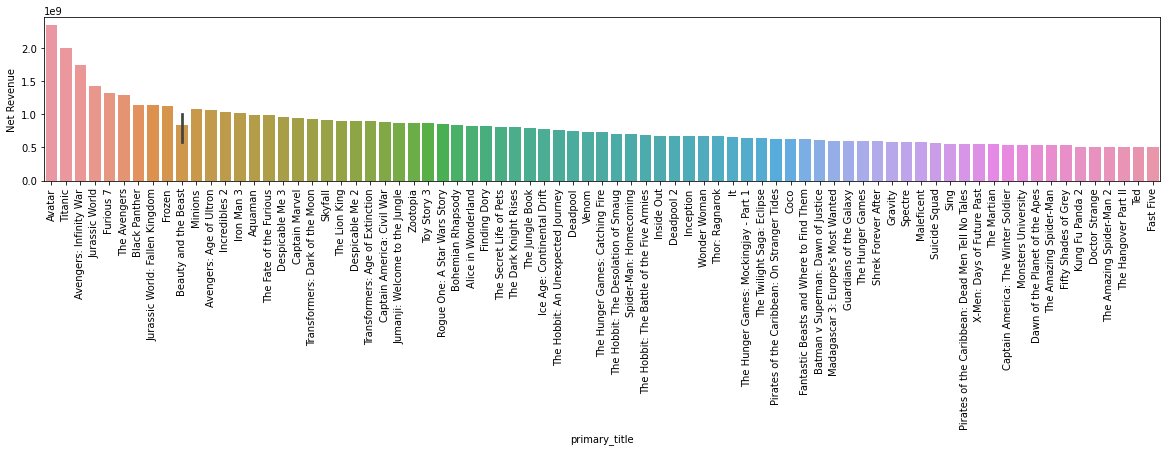

In [62]:
# bar plot for average rating of top 100 movies 
plt.figure(figsize = (20,3))
plt.xticks(rotation = 90)
sns.barplot(x=top_100_rev.primary_title, y=top_100_rev.net_revenue)
plt.ylabel('Net Revenue')
plt.show();


## Director Top 100 Movies Based On Revenue

In [29]:
# Merge top_100_rev and directors into one dataframe, 
top_100_dir = pd.merge(top_100_rev, directors, how='inner', on='movie_id')
top_100_dir = pd.merge(top_100_dir, persons, how='inner', on='person_id')
top_100_dir.drop_duplicates(subset=['movie_id'], inplace=True)
top_rev_dir_counts = top_100_dir.primary_name.value_counts().iloc[:15]
top_rev_dir_counts

Pierre Coffin        3
Peter Jackson        3
Anthony Russo        3
James Wan            2
Joss Whedon          2
Michael Bay          2
Marc Webb            2
Bryan Singer         2
Christopher Nolan    2
Jon Favreau          2
Francis Lawrence     2
Lee Unkrich          2
Sam Mendes           2
Alfonso Cuarón       1
Nasir Rahim          1
Name: primary_name, dtype: int64

### Bar Graph of Director Count in Top 100 Movies Based On Revenue

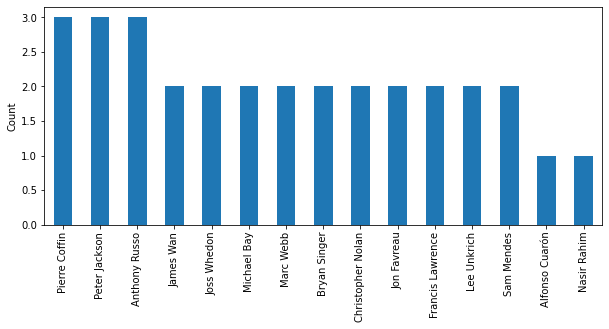

In [30]:
#plot of total times directors appeared in the top 100 movies based on net revenue
top_rev_dir_counts.plot(kind='bar', figsize=(10, 4), ylabel='Count');

### Net Revenue Associated With Directors in Top 100 Based On Net Revenue

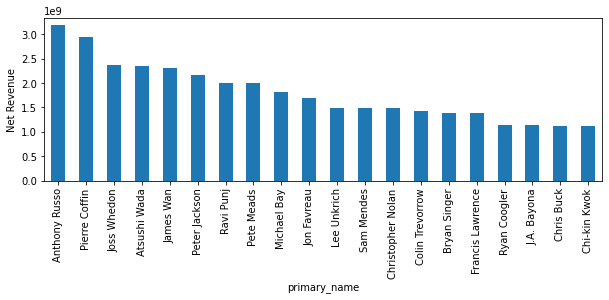

In [31]:
# Net Revenue of 100 movies grouped by director
top_dir_groupby = top_100_dir.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
top_dir_groupby = top_dir_groupby.net_revenue.iloc[:20]
# plot of net revenue of 100 movies grouped by director
top_dir_groupby.plot(kind='bar', figsize=(10, 3), ylabel='Net Revenue');

## Writers In Top 100 Movies Based On Revenue

In [32]:
# Merge top_100_rev and writers into one dataframe, 
top_100_writers = pd.merge(top_100_rev, writers, how='inner', on='movie_id')
top_100_writers = pd.merge(top_100_writers, persons, how='inner', on='person_id')
top_100_writers.drop_duplicates(subset=['movie_id'], inplace=True)
top_rev_writer_counts = top_100_writers.primary_name.value_counts().iloc[:15]
top_rev_writer_counts

Stan Lee              9
Linda Woolverton      3
Chris Morgan          3
Fran Walsh            3
Christopher Markus    3
Rick Jaffa            2
Brian Lynch           2
Cinco Paul            2
Rhett Reese           2
Suzanne Collins       2
Neal Purvis           2
Ehren Kruger          2
Ted Elliott           2
Jennifer Lee          2
Joan Canning Boris    1
Name: primary_name, dtype: int64

### Writer Count in Top 100 Movies Based On Revenue

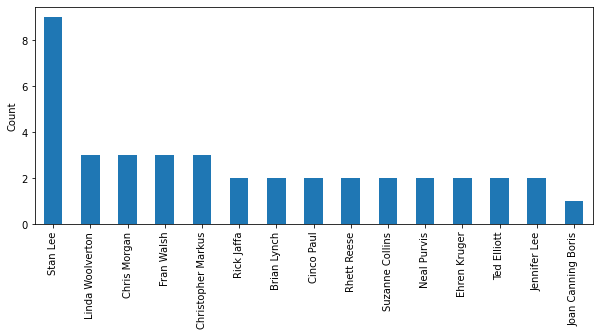

In [33]:
#plot of total times writers appeared in the top 100 movies based on net revenue
top_rev_writer_counts.plot(kind='bar', figsize=(10, 4), ylabel='Count');

### Net Revenue Associated With Each Writer In Top 100 Movies Based On Revenue

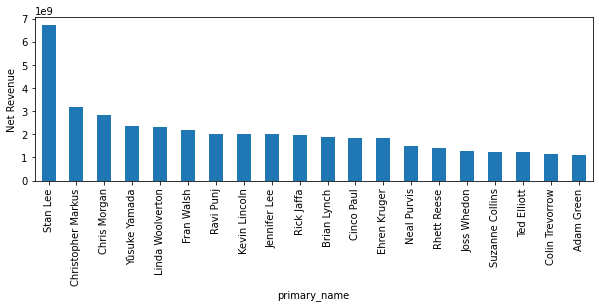

In [34]:
# Net Revenue of 100 movies grouped by writer
top_writer_groupby = top_100_writers.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
top_writer_groupby = top_writer_groupby.net_revenue.iloc[:20]
# plot of net revenue of 100 movies grouped by writer
top_writer_groupby.plot(kind='bar', figsize=(10, 3), ylabel='Net Revenue');

## Actors In Top 100 Movies Based On Net Revenue

In [35]:
# Merging principals and persons tables to obtain actor information
top_100_princ = pd.merge(top_100_rev, principals, how="inner", on='movie_id')
principals_rev = pd.merge(top_100_princ, persons, how="inner", on='person_id')
# Filtering for Actors
top_100_actors = principals_rev[(principals_rev.category == 'actress') | (principals_rev.category == 'actor')]
top_rev_actors_count = top_100_actors.primary_name.value_counts().iloc[:20]
top_rev_actors_count

Robert Downey Jr.     6
Chris Evans           5
Dwayne Johnson        4
Ian McKellen          4
Scarlett Johansson    4
Vin Diesel            4
Jennifer Lawrence     3
Chris Pratt           3
Kristen Wiig          3
Richard Armitage      3
Martin Freeman        3
Chris Hemsworth       3
Léa Seydoux           3
Josh Gad              3
Liam Hemsworth        3
Mark Ruffalo          3
Johnny Depp           3
Josh Hutcherson       3
Michael Keaton        2
Cate Blanchett        2
Name: primary_name, dtype: int64

### Count Of Actors In Top 100 Movies Based On Net Revenue

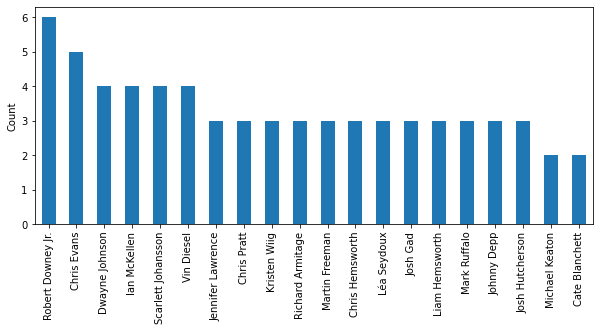

In [36]:
#plot of total times writers appeared in the top 100 movies based on net revenue
top_rev_actors_count.plot(kind='bar', figsize=(10, 4), ylabel='Count');

### Net Revenue Associated With Each Actor In Top 100 Movies Based On Net Revenue

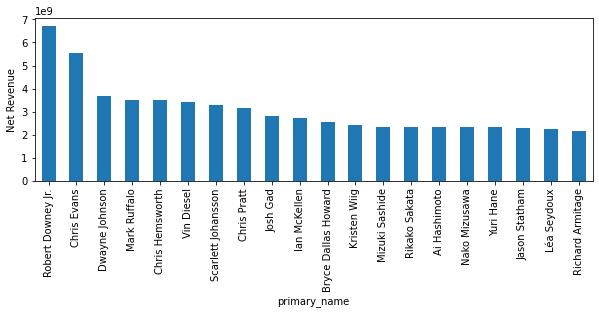

In [66]:
# Net Revenue of 100 movies grouped by writer
top_actor_groupby = top_100_actors.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
top_actor_groupby = top_actor_groupby.net_revenue.iloc[:20]
# plot of net revenue of 100 movies grouped by writer
top_actor_groupby.plot(kind='bar', figsize=(10, 3), ylabel='Net Revenue');

## Net Revenue Per Genre

In [38]:
# splitting genre values into new columns
genre_split =top_100_rev["genres"].str.split(",", n = 3, expand = True)
genre_split = genre_split.rename(columns={0:'genre_1', 1:'genre_2', 2:'genre_3'})
genre_rev = pd.merge(top_100_rev, genre_split, how='left', left_index=True, right_index=True)
genre_rev = genre_rev.drop(columns='genres')
genre_1_group = genre_rev.groupby('genre_1').sum()
genre_1_net = genre_1_group.net_revenue
genre_2_group = genre_rev.groupby('genre_2').sum()
genre_2_net = genre_2_group.net_revenue
genre_3_group = genre_rev.groupby('genre_3').sum()
genre_3_net = genre_3_group.net_revenue

In [39]:
genre_net = pd.merge(genre_1_net, genre_2_net, how='inner', left_index=True, right_index=True)
genre_net = pd.merge(genre_net, genre_3_net, how='inner', left_index=True, right_index=True)

In [40]:
genre_net['genre_net_avg'] = 0
genre_net_avg = ((genre_net.net_revenue_x + genre_net.net_revenue_y + genre_net.net_revenue) / 3)
genre_net['genre_net_avg'] = genre_net_avg

In [41]:
genre_net = genre_net.reset_index()
genre_net = genre_net.rename(columns={'index': 'genres'})
genre_net = genre_net.sort_values(by='genre_net_avg', ascending=False)
genre_net 

,genres,net_revenue_x,net_revenue_y,net_revenue,genre_net_avg
5,Sci-Fi,6.711334e+08,1.321327e+09,1.939831e+10,7.130256e+09
1,Comedy,1.012481e+09,5.594548e+08,1.482484e+10,5.465592e+09
4,Fantasy,1.947961e+09,6.974854e+09,7.404298e+09,5.442371e+09
0,Animation,1.347309e+09,1.216970e+10,1.557358e+09,5.024790e+09
2,Drama,3.481564e+09,5.286053e+09,1.447559e+09,3.405059e+09
3,Family,6.062706e+09,2.214898e+09,1.925846e+09,3.401150e+09
6,Thriller,7.376286e+08,1.471897e+09,6.161206e+09,2.790244e+09


### Graph of Net Revenues Per Genre

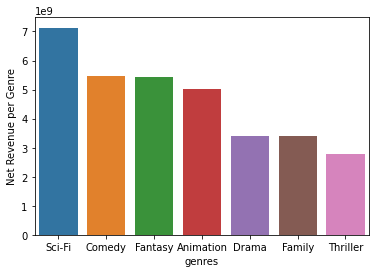

In [56]:
sns.barplot(x=genre_net.genres, y=genre_net.genre_net_avg)
plt.ylabel('Net Revenue per Genre')
plt.show();

# Runtime Statistical Analysis (Collaboration With Reese) 

In [19]:
# list of total_runtimes
runtimes = movie_info.runtime_minutes
runtimes.dropna(inplace=True)

In [20]:
#runtimes sorted in descending order
runtimes.sort_values(ascending = False).head()

70280    51420.0
27683    14400.0
15171     1440.0
71441     1100.0
72424      808.0
Name: runtime_minutes, dtype: float64

In [21]:
# Total movies mean runtime
total_mean_runtime = runtimes.mean()
total_mean_runtime

94.6540400990398

In [22]:
# top 100 runtimes
top_100_rt = top_100_movies.runtime_minutes
top_100_rt.dropna(inplace=True)

In [23]:
# top 100 mean runtimes
top_100_mean_rt = top_100_rt.mean()
top_100_mean_rt

127.99

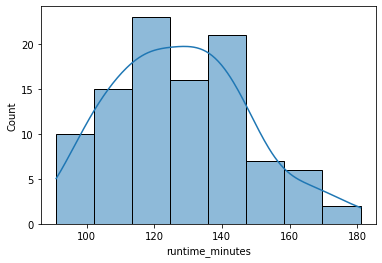

In [24]:
top_100_rt_hist = sns.histplot(top_100_rt, kde=True)
top_100_rt_hist;

In [25]:
cleaned_movies = movie_info[(movie_info.runtime_minutes < 180) & (movie_info.runtime_minutes > 30)]
clean_movies_mean_rt = cleaned_movies.runtime_minutes.mean()
clean_movies_mean_rt

93.26160003652356

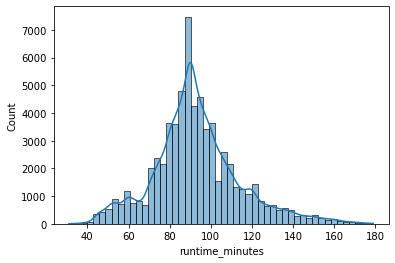

In [26]:
clean_rt_hist = sns.histplot(cleaned_movies.runtime_minutes, kde=True, bins = 50)
clean_rt_hist;

# Genre Section (Hannah, Ryan, Chris Collaboration)

## Genre Counts In Top 60 Movies

### Preparing Budget Table For Merge

In [48]:
# Removing dollar signs from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace('$','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$','')

In [49]:
# Removing commas from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace(',','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',','')

In [50]:
#Dropping uneccesary rows
budgets = budgets.drop(columns=['id', 'release_date'])
# Rename movie row to primary_title for consistency with previous tables
budgets = budgets.rename(columns={'movie': 'primary_title'})
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [51]:
#Checking Data Types
budgets.dtypes

primary_title        object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [52]:
#Changing datatypes to int
budgets['production_budget'] = budgets['production_budget'].astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)
budgets.dtypes

primary_title         object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [53]:
#adding net revenue columns
net = budgets.worldwide_gross - budgets.production_budget
budgets['net_revenue'] = net
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,net_revenue
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [54]:
# verify info and checking for null values
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   float64
 3   worldwide_gross    5782 non-null   float64
 4   net_revenue        5782 non-null   float64
dtypes: float64(4), object(1)
memory usage: 226.0+ KB


### Genre Counts In Top 60 Movies Based on Rating (Popularity)

In [55]:
# merge movie ratings with movie basics
movie_rating_info = pd.merge(movie_basics, movie_ratings, how="inner", on='movie_id')

In [56]:
# movies sort by most votes and avereage rating
movie_rating_info_sorted = movie_rating_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 60 movies selected based on rating
top_60_pop = movie_rating_info_sorted.iloc[:60]
# top 60 rated movies resorted by movie rating
top_60_pop = top_60_pop.sort_values(by='averagerating', ascending=False)
#index reseted for top 60 rated movies
top_60_pop = top_60_pop.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_60_pop = top_60_pop.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})

In [57]:
# Declaring new variable to split genre data into separate columns
pop_string_split = top_60_pop
# splitting genre values into new columns
pop_genre_split = pop_string_split["genres"].str.split(",", n = 3, expand = True)
# concatination genre columns into 1 series
top_60_pop_genres = pd.concat([pop_genre_split[0], pop_genre_split[1], pop_genre_split[2]])
# drop na from genre series
top_60_pop_genres = top_60_pop_genres.dropna()
# counting genre counts in top 100 movie list
top_60_pop_genre_counts = top_60_pop_genres.value_counts()
top_60_pop_genre_counts

Adventure    39
Action       32
Sci-Fi       23
Drama        20
Fantasy      10
Thriller      9
Comedy        9
Biography     8
Mystery       5
Crime         5
Animation     3
History       2
Family        1
Western       1
Romance       1
Horror        1
Music         1
dtype: int64

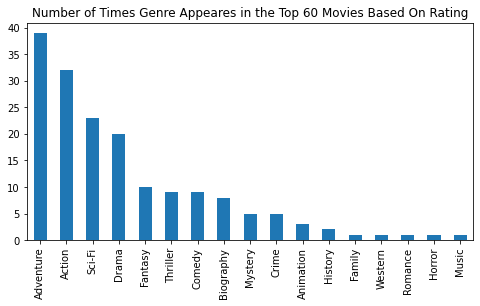

In [58]:
# bar plot of top 60 genre counts based on popularity
top_60_pop_genre_counts.plot(kind='bar', figsize=(8, 4), title='Number of Times Genre Appeares in the Top 60 Movies Based On Rating', );

### Genre Counts In Top 60 Movies Based on Net Revenue

In [59]:
# merge movie basics with budget
movie_revenue_info = pd.merge(movie_basics, budgets, how="inner", on='primary_title')


In [60]:
#Drop Duplicate Titles
movie_revenue_info = movie_revenue_info.drop_duplicates(subset=['primary_title'])

In [61]:
# movies sort by net revenue
revenue_sorted = movie_revenue_info.sort_values(by='net_revenue', ascending=False)
# top 60 movies selected
top_60_rev = revenue_sorted.iloc[:60]
# top 60 movies sorted specifically by movie rating
top_60_rev = top_60_rev.reset_index().drop(columns='index')

In [62]:
# Declaring new variable to split genre data into separate columns
string_split_rev = top_60_rev
# splitting genre values into new columns
genre_split_rev = string_split_rev["genres"].str.split(",", n = 3, expand = True)
# concatination genre columns into 1 series
top_60_rev_genres = pd.concat([genre_split_rev[0], genre_split_rev[1], genre_split_rev[2]])
# drop na from genre series
top_60_rev_genres = top_60_rev_genres.dropna()
# counting genre counts in top 100 movie list
top_60_rev_genre_counts = top_60_rev_genres.value_counts()
top_60_rev_genre_counts

Adventure    48
Action       33
Sci-Fi       19
Comedy       15
Animation    13
Fantasy      11
Thriller      8
Drama         7
Family        3
Crime         3
Horror        2
Biography     1
Sport         1
Romance       1
Music         1
dtype: int64

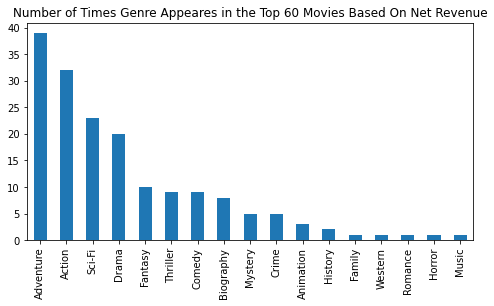

In [63]:
# bar plot of top 60 genre counts based on popularity
top_60_pop_genre_counts.plot(kind='bar', figsize=(8, 4), title='Number of Times Genre Appeares in the Top 60 Movies Based On Net Revenue');